In [1]:
from kndetect.plot_lightcurve import plot_light_curve
import matplotlib.pyplot as plt

In [2]:
import os 
import numpy as np
import pandas as pd
import pickle 
from astropy.table import Table

In [3]:
train_data_head_path = '/sps/lsst/users/bbiswas/data/kilonova_datasets/train_final_master_HEAD.FITS'
train_data_phot_path = '/sps/lsst/users/bbiswas/data/kilonova_datasets/train_final_master_PHOT.FITS'
test_data_head_path = '/sps/lsst/users/bbiswas/data/kilonova_datasets/test_final_master_HEAD.FITS'
test_data_phot_path = '/sps/lsst/users/bbiswas/data/kilonova_datasets/test_final_master_PHOT.FITS'

In [4]:
from kndetect.utils import get_data_dir_path, load_pcs
data_dir = get_data_dir_path()

In [5]:
df_header = Table.read(train_data_head_path, format='fits').to_pandas()
df_phot = Table.read(train_data_phot_path, format='fits').to_pandas()

In [6]:
df_header_test = Table.read(test_data_head_path, format='fits').to_pandas()
df_phot_test = Table.read(test_data_phot_path, format='fits').to_pandas()

In [7]:
df_header_test.columns

Index(['SNID', 'SNTYPE', 'SUBSURVEY', 'IAUC', 'FAKE', 'RA', 'PIXSIZE', 'NXPIX',
       'NYPIX', 'CCDNUM', 'NOBS', 'PTROBS_MIN', 'PTROBS_MAX', 'MWEBV',
       'MWEBV_ERR', 'REDSHIFT_HELIO', 'REDSHIFT_HELIO_ERR', 'REDSHIFT_FINAL',
       'REDSHIFT_FINAL_ERR', 'VPEC', 'VPEC_ERR', 'HOSTGAL_OBJID',
       'HOSTGAL_PHOTOZ', 'HOSTGAL_PHOTOZ_ERR', 'HOSTGAL_SPECZ',
       'HOSTGAL_SPECZ_ERR', 'HOSTGAL_SNSEP', 'HOSTGAL_LOGMASS',
       'HOSTGAL_LOGMASS_ERR', 'HOSTGAL_MAG_g', 'HOSTGAL_MAG_r',
       'HOSTGAL_SB_FLUXCAL_g', 'HOSTGAL_SB_FLUXCAL_r', 'PEAKMJD',
       'SEARCH_TYPE', 'SIM_MODEL_NAME', 'SIM_MODEL_INDEX', 'SIM_TYPE_INDEX',
       'SIM_TYPE_NAME', 'SIM_LIBID', 'SIM_NGEN_LIBID', 'SIM_NOBS_UNDEFINED',
       'SIM_SEARCHEFF_MASK', 'SIM_REDSHIFT_HELIO', 'SIM_REDSHIFT_CMB',
       'SIM_REDSHIFT_HOST', 'SIM_VPEC', 'SIM_DLMU', 'SIM_LENSDMU', 'SIM_RA',
       'SIM_MWEBV', 'SIM_PEAKMJD', 'SIM_MAGSMEAR_COH', 'SIM_AV', 'SIM_RV',
       'SIM_PEAKMAG_g', 'SIM_PEAKMAG_r', 'SIM_EXPOSURE_g', 'SIM_EXPOSU

In [8]:
import seaborn as sns

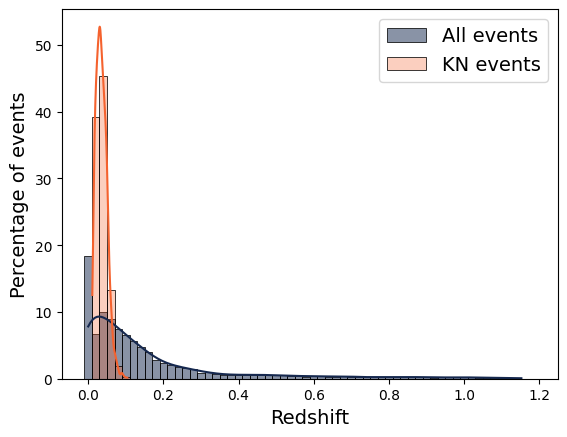

In [9]:
bins =np.arange(-.01, 1.2, 0.02)
sns.histplot(df_header[df_header['SNTYPE'] != 149]['SIM_REDSHIFT_HOST'], alpha=0.5, kde=True, bins=bins, stat='percent', color='#15284F', label="All events")
plt.xlabel("Redshift", fontsize=14)
plt.ylabel("Percentage of events", fontsize=14)
sns.histplot(df_header_test[(df_header_test['SNTYPE'] == 151) | (df_header_test['SNTYPE'] == 150)]['SIM_REDSHIFT_HOST'], stat='percent', bins=bins, alpha=0.3, color='#F5622E', kde=True, label="KN events")
plt.legend(fontsize=14)
plt.savefig("results/redshift_distrib")

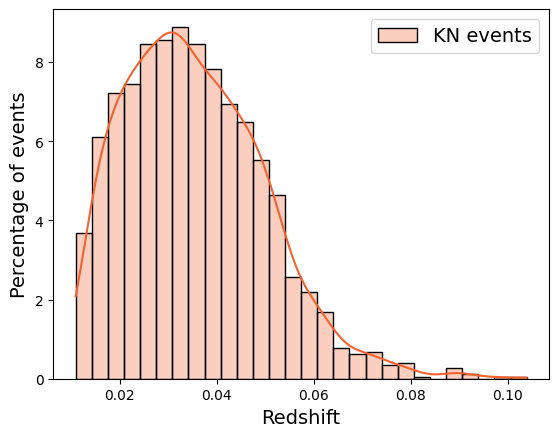

In [10]:
sns.histplot(df_header_test[(df_header_test['SNTYPE'] == 151) | (df_header_test['SNTYPE'] == 150)]['SIM_REDSHIFT_HOST'], stat='percent', alpha=0.3, color='#F5622E', kde=True, label="KN events")
plt.xlabel("Redshift", fontsize=14)
plt.ylabel("Percentage of events", fontsize=14)
plt.legend(fontsize=14)

##### 

Text(0.5, 1.0, 'Distribution of non KN events')

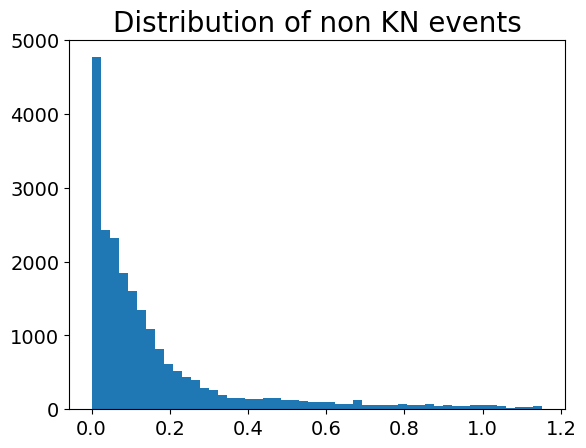

In [11]:
plt.hist(df_header[df_header['SNTYPE'] != 149]['SIM_REDSHIFT_HOST'],bins=50)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Distribution of non KN events", fontsize=20)

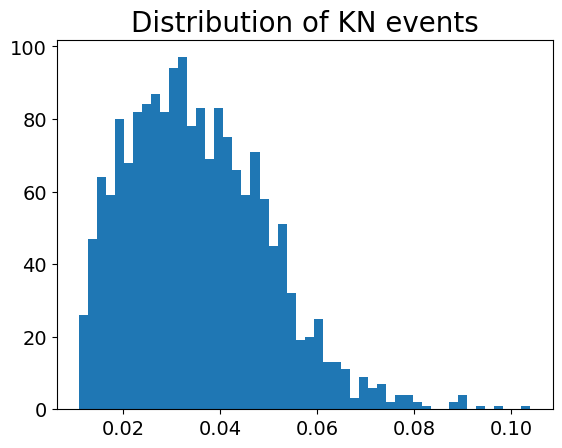

In [12]:
plt.hist(df_header_test[(df_header_test['SNTYPE'] == 151) | (df_header_test['SNTYPE'] == 150)]['SIM_REDSHIFT_HOST'],bins=50)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Distribution of KN events", fontsize=20)
plt.savefig("KN redshift distrib")

In [13]:
def get_band_coeff_dict(features):
    band_coeff_dict = {}
    for band in ['g', 'r']:
        coeffs =[]
        for pc_num in range(3):
            coeffs.append(features["coeff" + str(pc_num+1) + "_" + band])
            
        if band == 'g':
            band_coeff_dict[b'g'] = coeffs
        else:
            band_coeff_dict[b'r'] = coeffs
    return band_coeff_dict

# Plots for partial light curve

In [14]:
sub_directory = "partial"
flux_lim =200

In [15]:
partial_features_df = pd.read_csv(os.path.join(data_dir, sub_directory, "train_features.csv"),index_col=0)

/pbs/throng/lsst/users/bbiswas/kndetect/kndetect/plot_lightcurve.py:105: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax.errorbar(


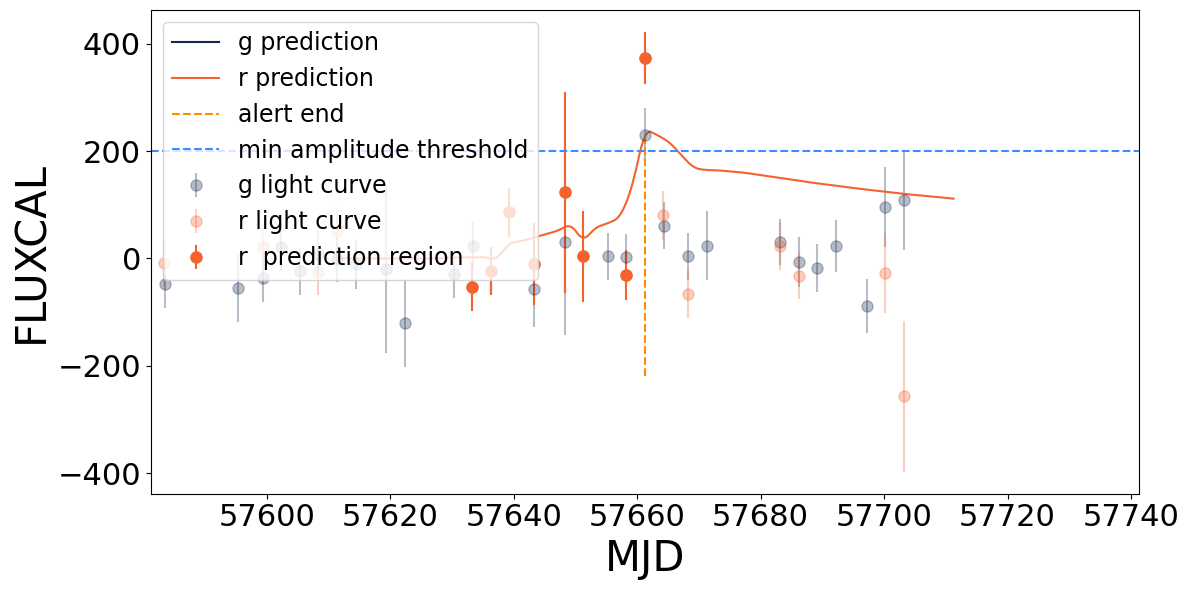

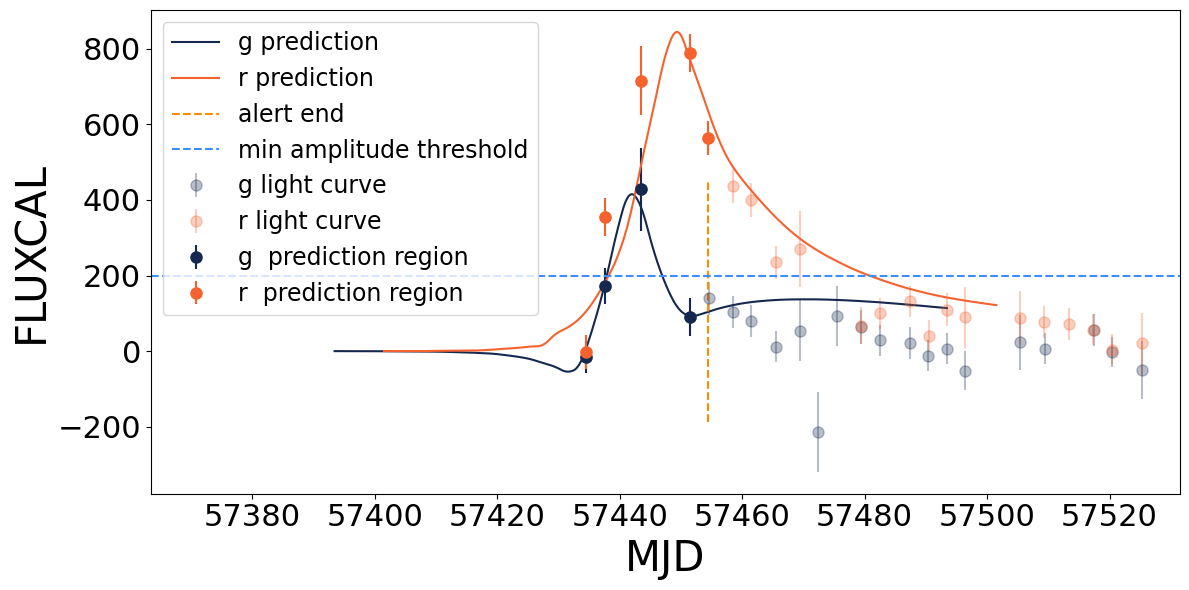

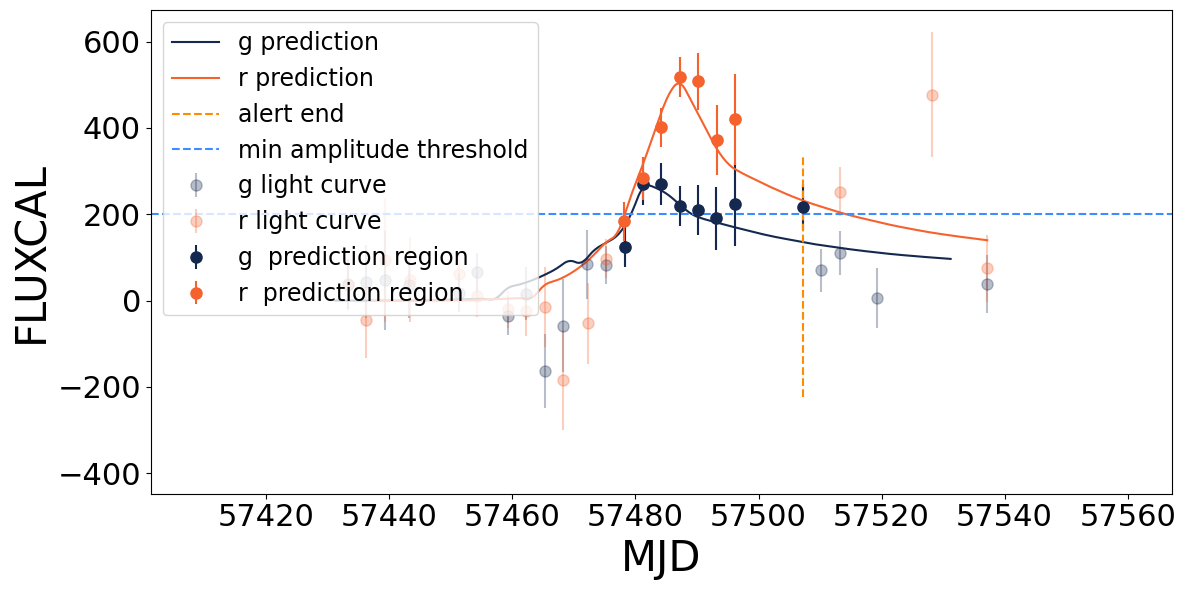

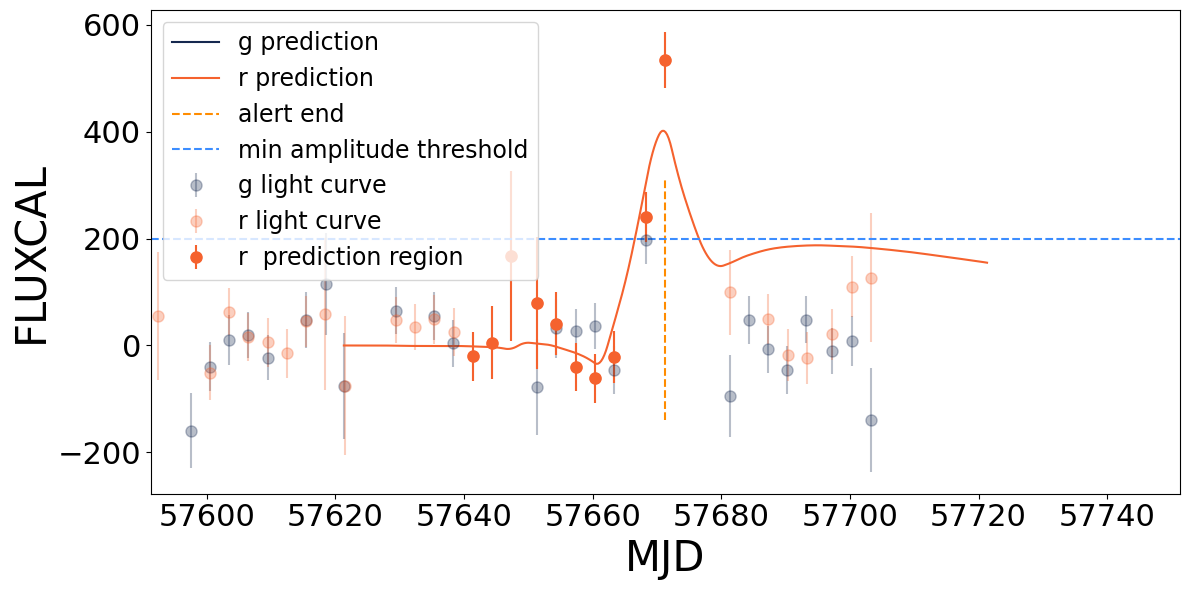

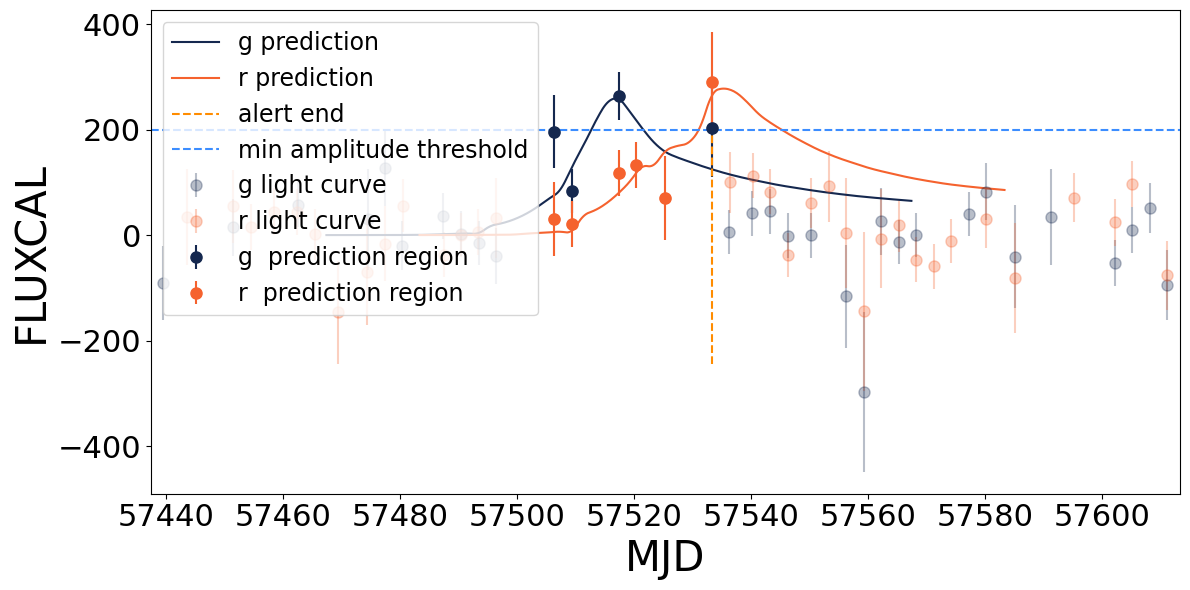

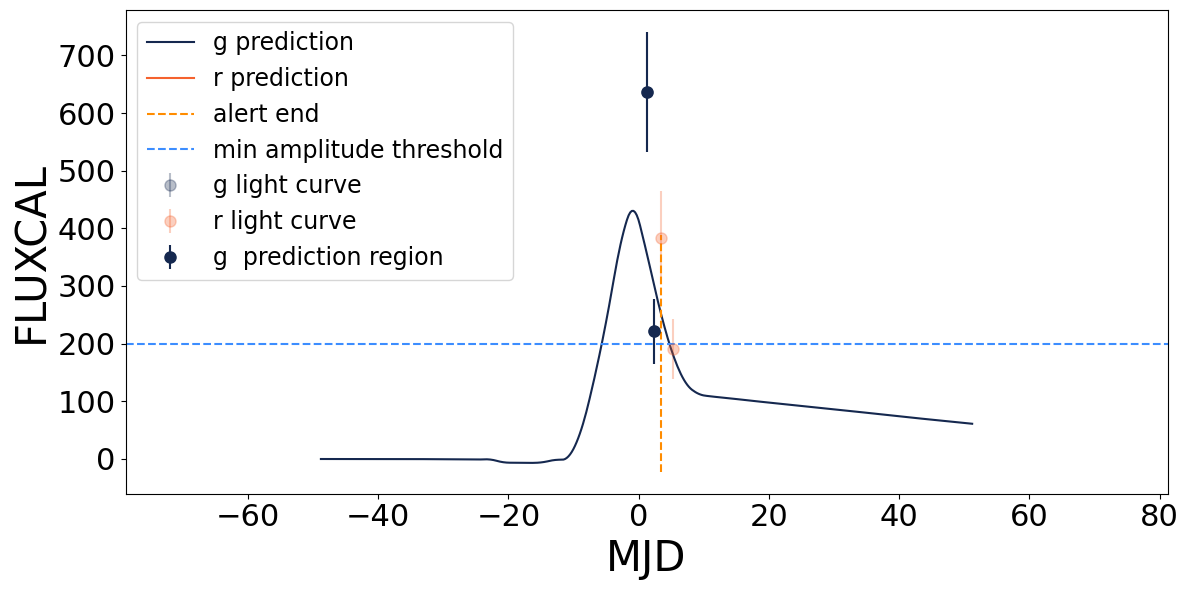

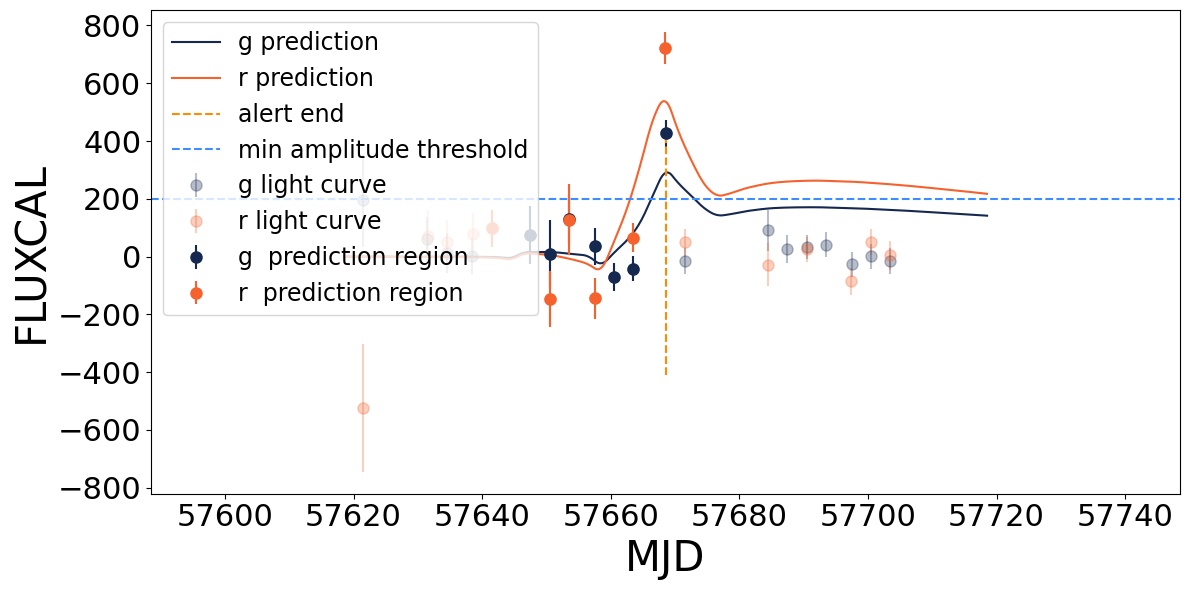

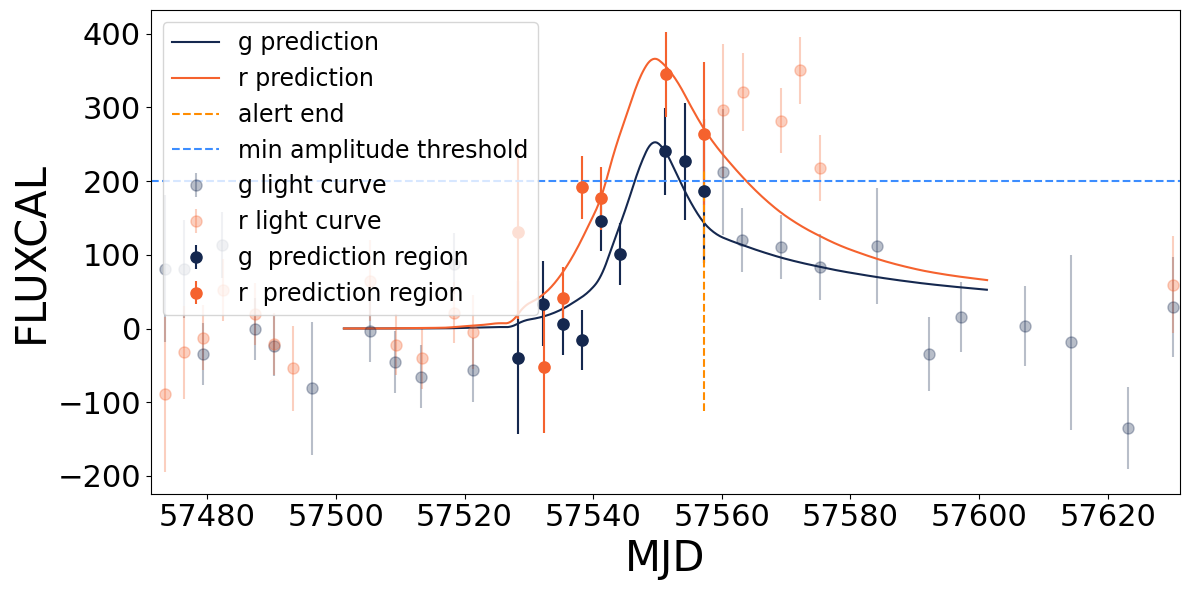

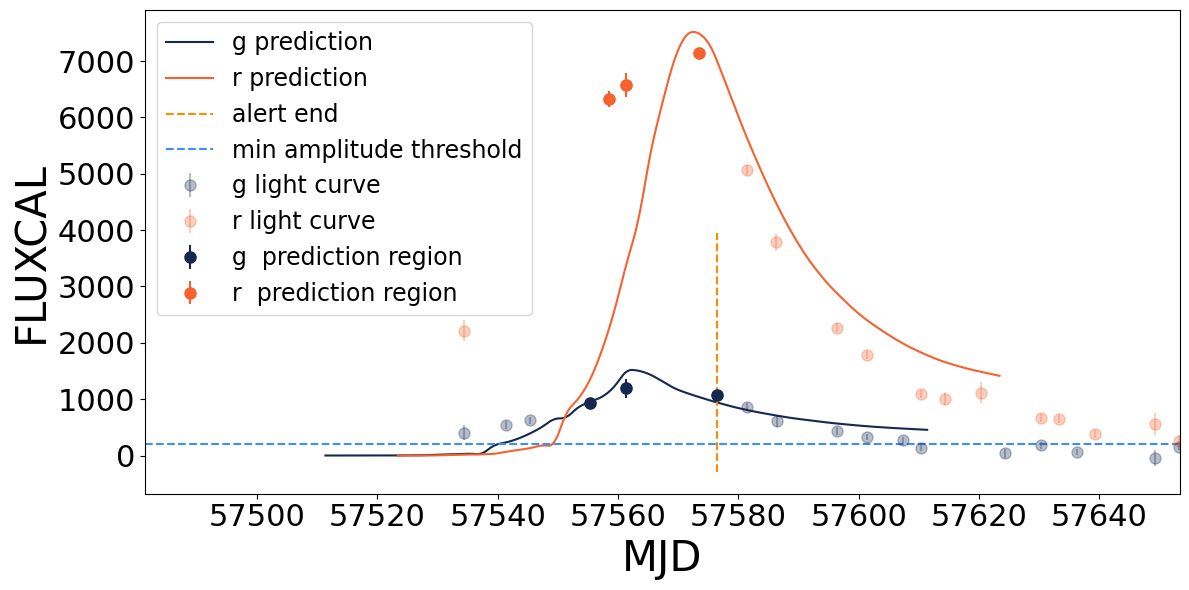

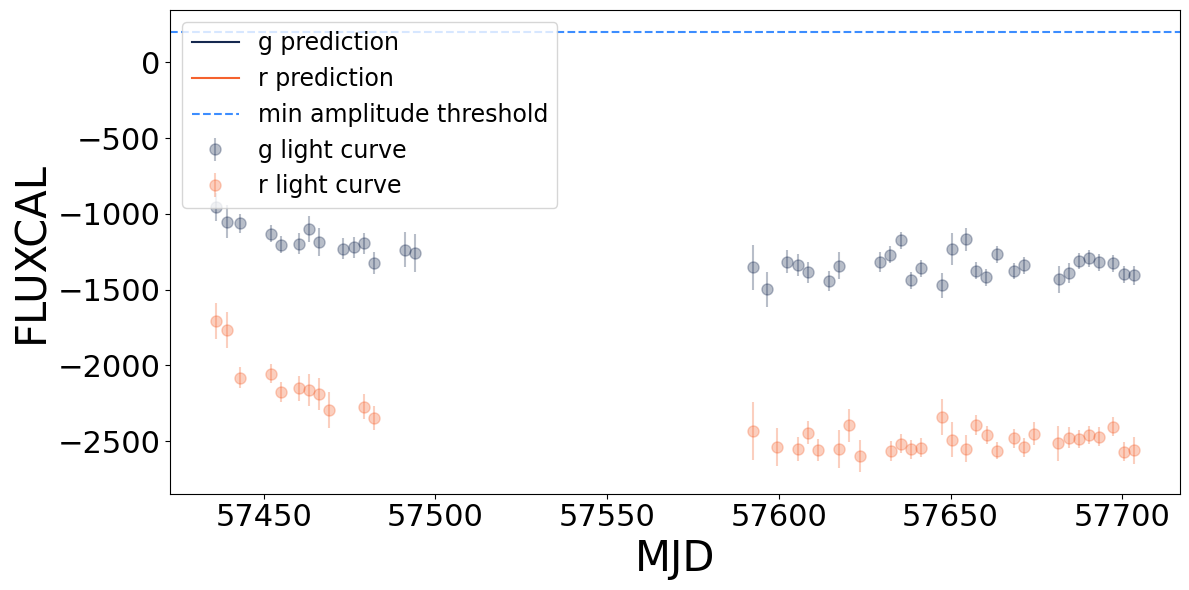

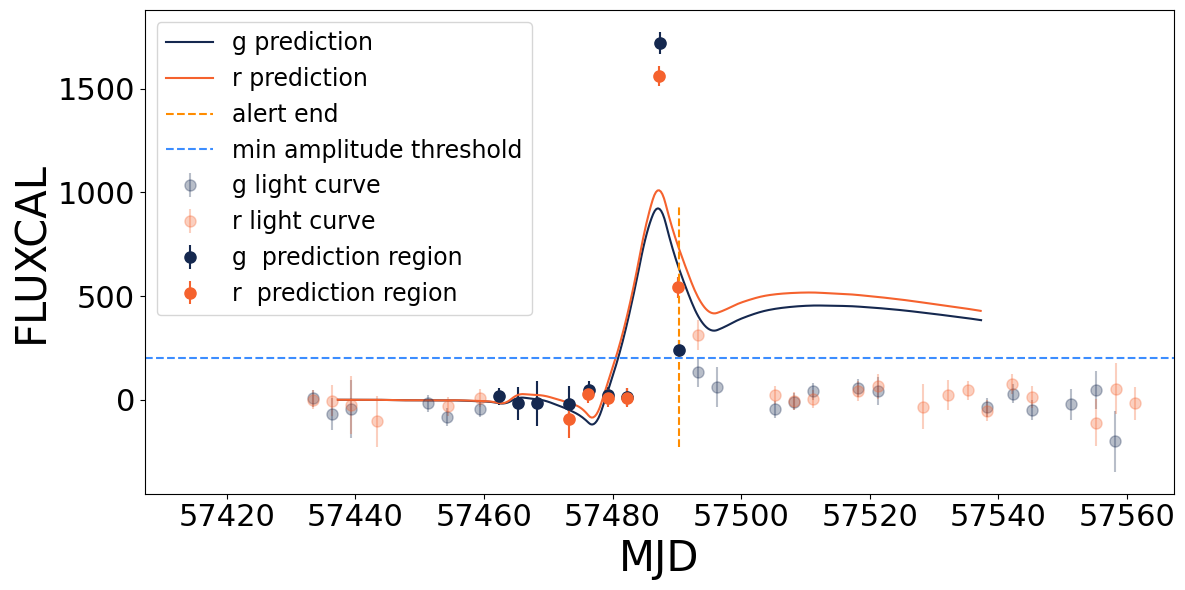

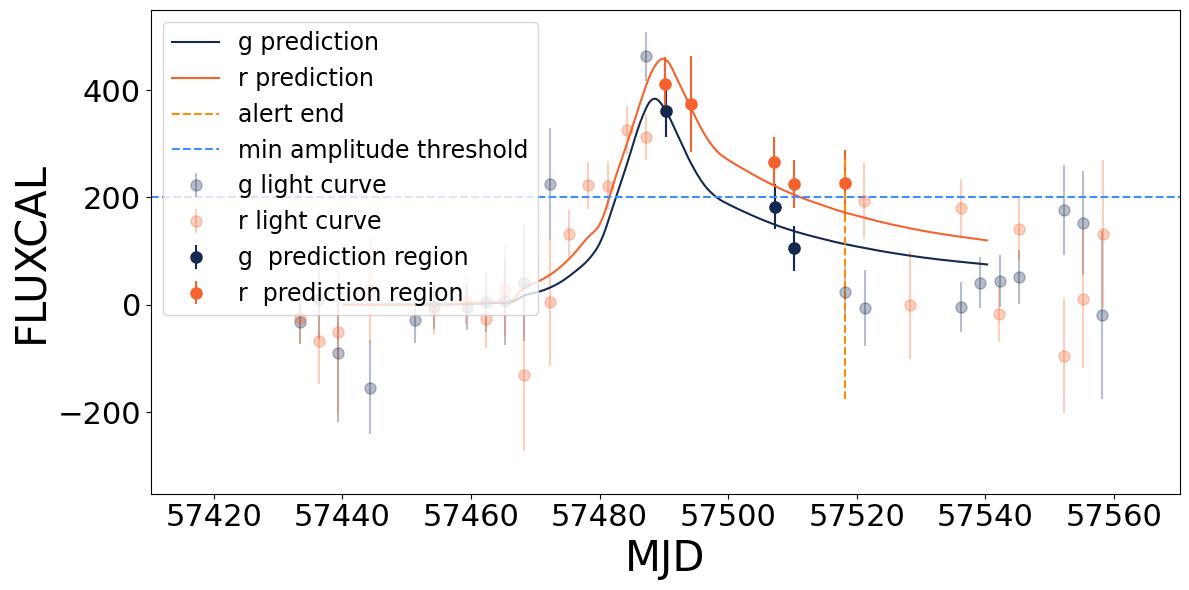

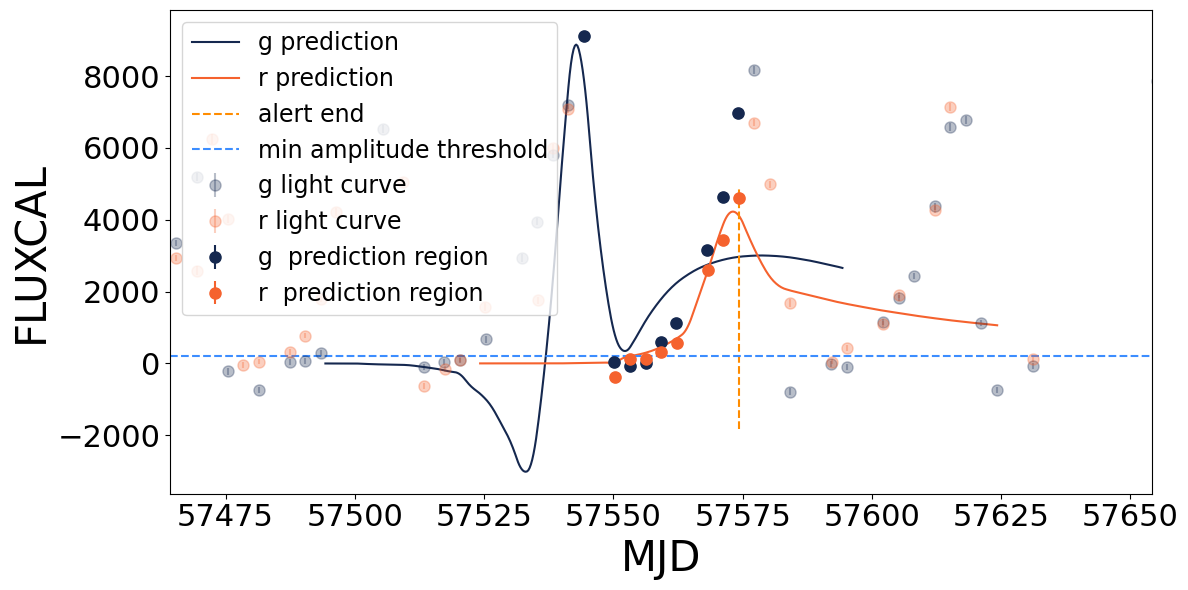

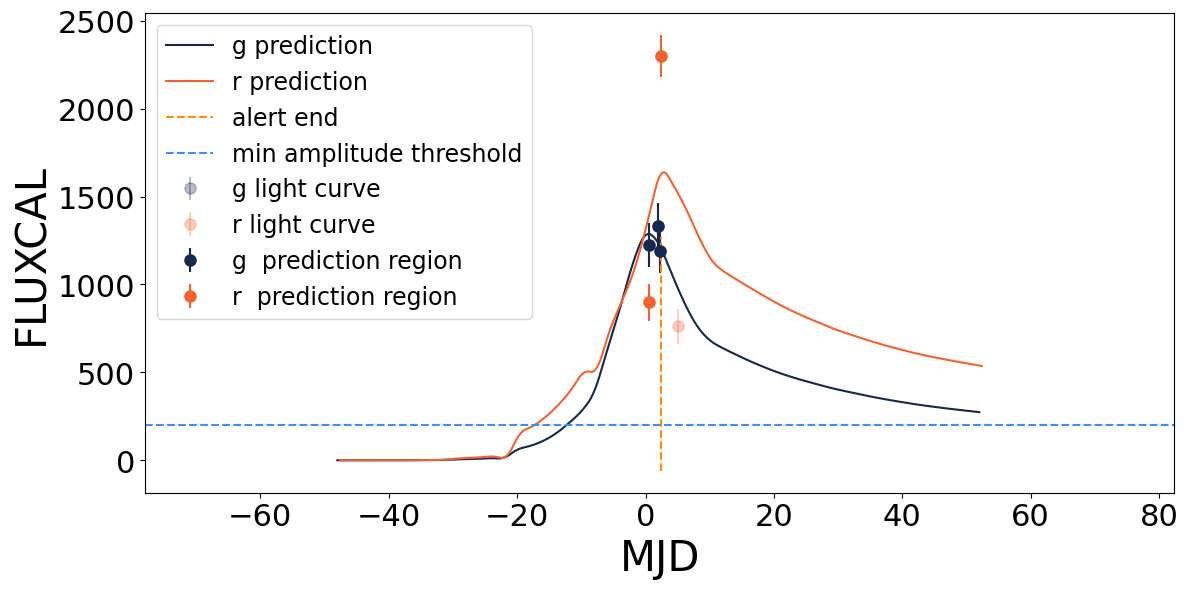

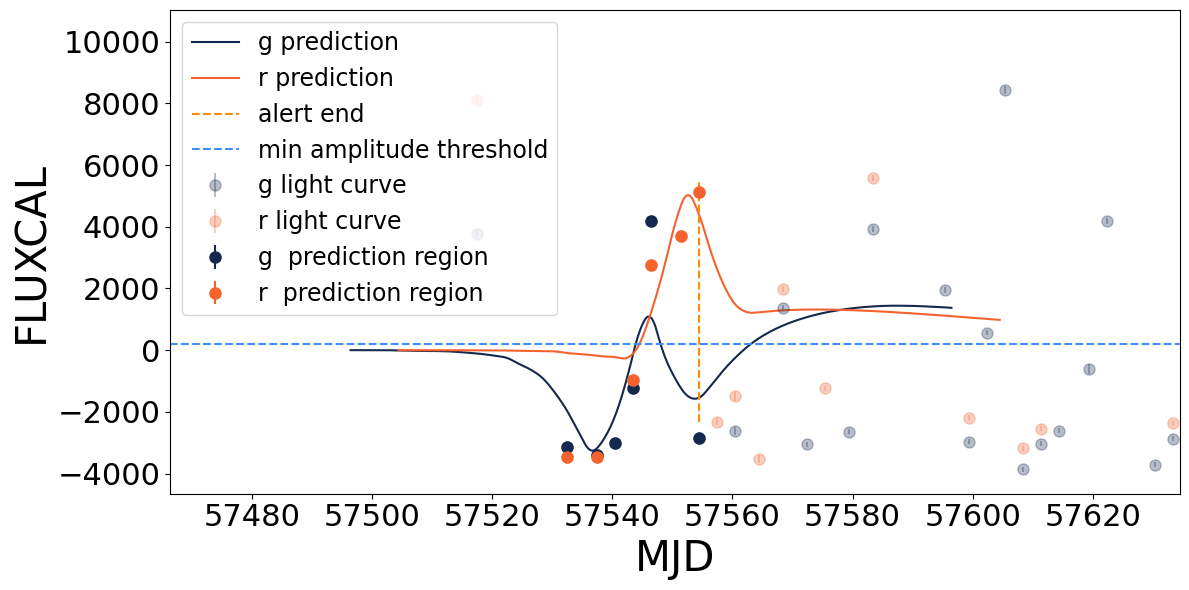

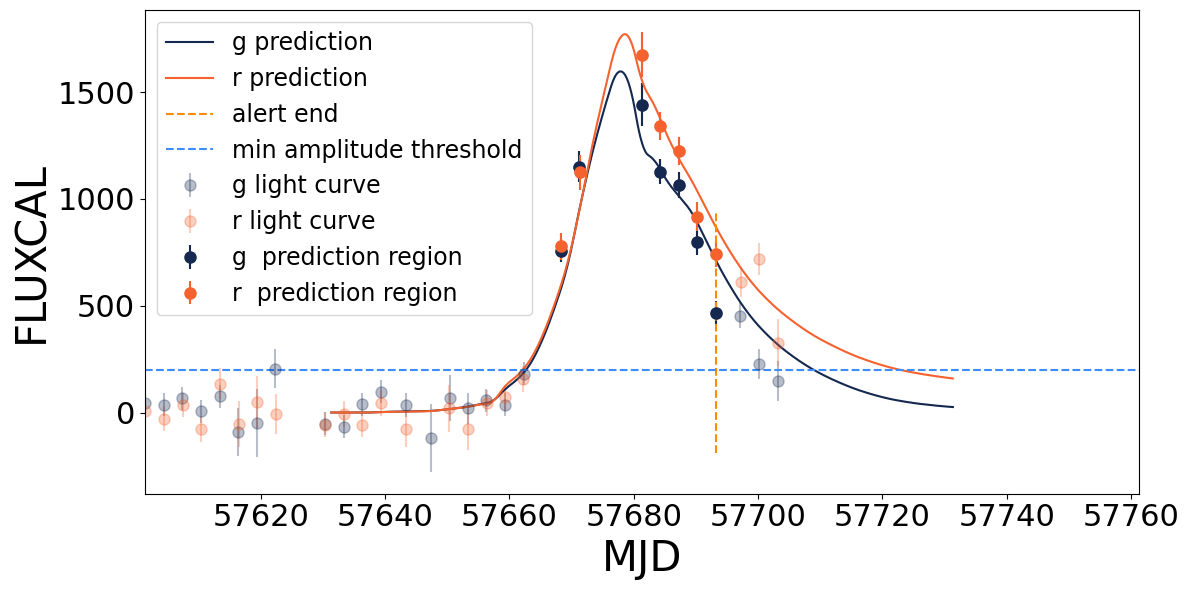

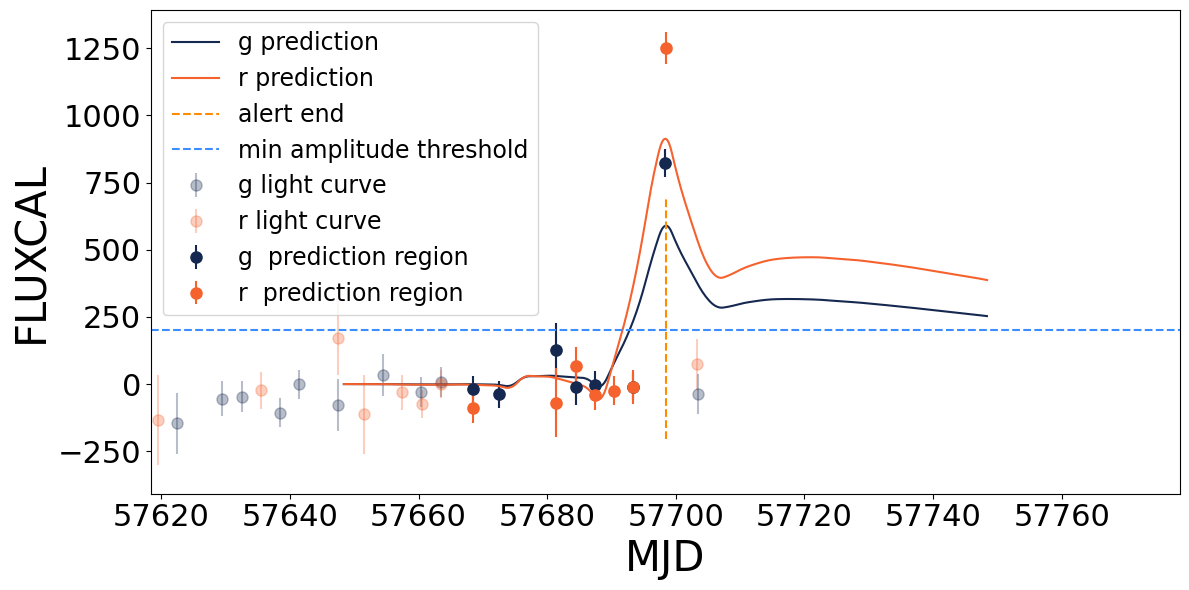

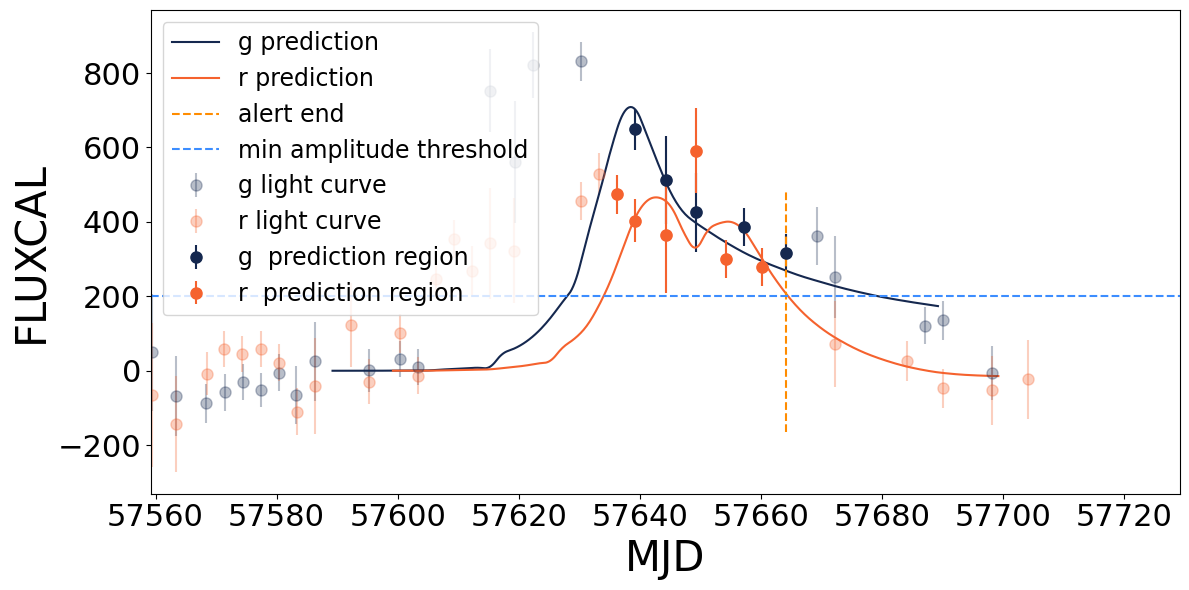

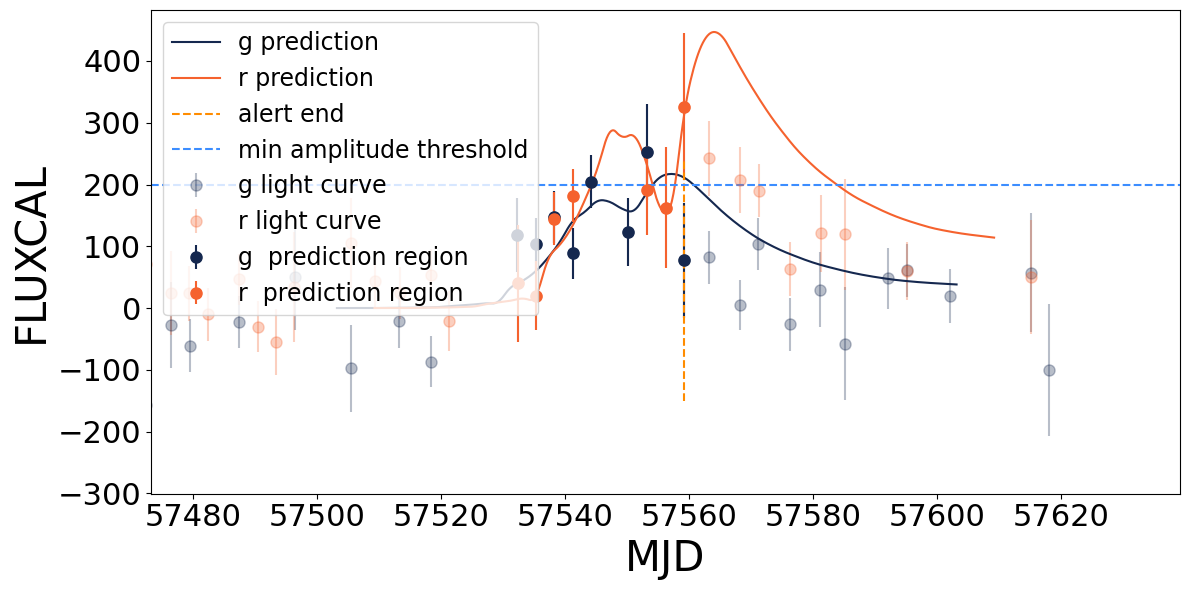

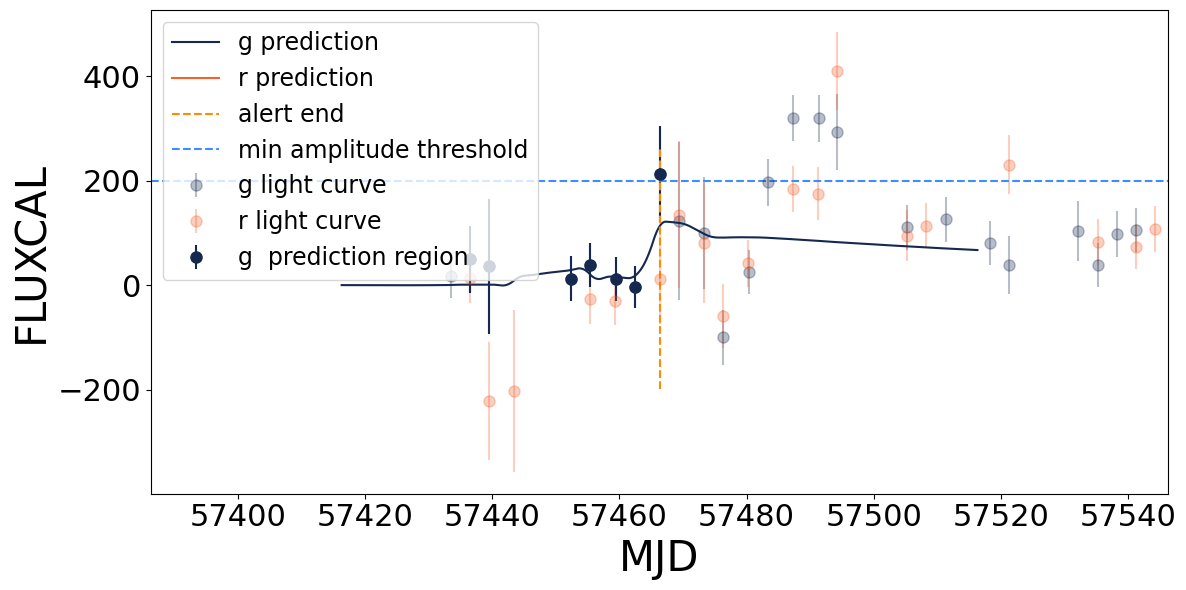

In [16]:
from kndetect.plot_lightcurve import plot_predicted_bands
color_band_dict = {b'g': '#15284F', b'r': '#F5622E'}
count = 0
for _, object_features in partial_features_df.iterrows():
    snid = object_features["key"]

    object_lc = df_phot[df_phot["SNID"]==snid]

    band_coeff_dict = get_band_coeff_dict(object_features)
    plot_predicted_bands(lc=object_lc, all_band_coeff_dict=band_coeff_dict, features=object_features, color_band_dict=color_band_dict, flux_lim=flux_lim, pcs=load_pcs(), band_map={b'r': 'r',b'g':'g'}, duration=30)
    plt.show()
    plt.close()
    count+=1
    if count==20:
        break

          SNID  SNTYPE SUBSURVEY     IAUC  FAKE        RA  PIXSIZE  NXPIX  \
10966  3347880     151      b' '  b'NULL'     2  4.383388      1.0     -9   

       NYPIX  CCDNUM  ...  SIM_MWEBV   SIM_PEAKMJD  SIM_MAGSMEAR_COH   SIM_AV  \
10966     -9       0  ...    0.02057  57501.402344               0.0  0.03686   

       SIM_RV  SIM_PEAKMAG_g  SIM_PEAKMAG_r  SIM_EXPOSURE_g  SIM_EXPOSURE_r  \
10966     3.1      17.623735      17.990177             1.0             1.0   

       SIM_SUBSAMPLE_INDEX  
10966                   -9  

[1 rows x 60 columns]
{b'g': [0.8968034459481385, 0.1970147220512817, 0.0091034499027524], b'r': [0.9263872997297662, 0.1604691823424509, 0.0244338214197837]}


/pbs/throng/lsst/users/bbiswas/kndetect/kndetect/plot_lightcurve.py:105: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax.errorbar(


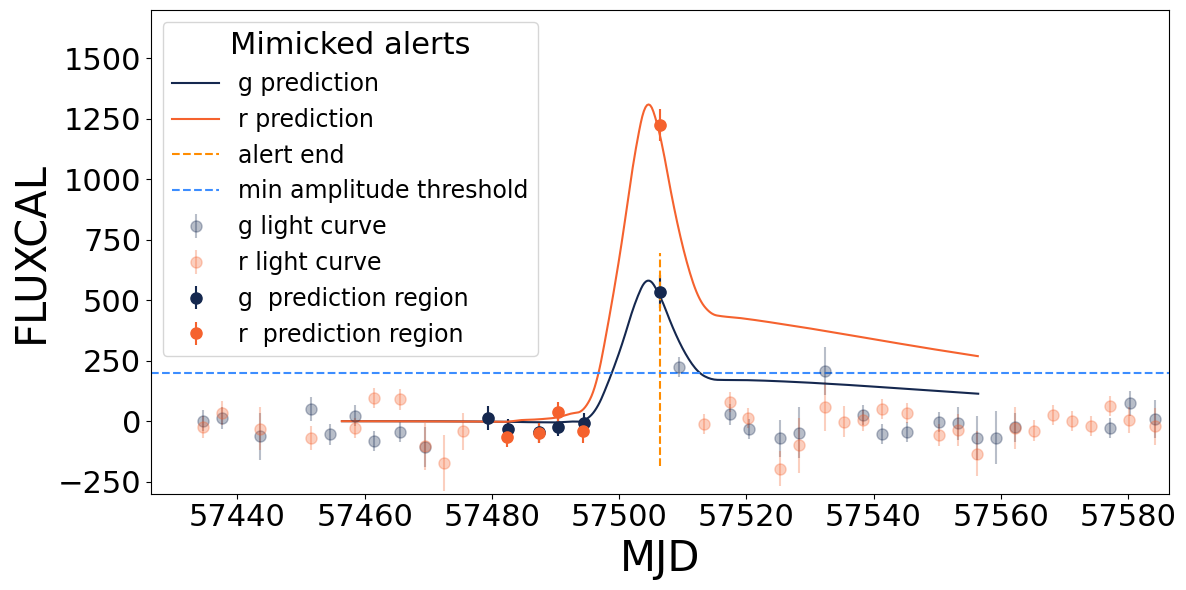

In [17]:

snid = 3347880


object_features = partial_features_df[partial_features_df["key"]==snid].squeeze()

object_lc = df_phot[df_phot["SNID"]==snid]
print(df_header[df_header["SNID"]==snid])
band_coeff_dict = get_band_coeff_dict(object_features)
print(band_coeff_dict)
plot_predicted_bands(lc=object_lc, all_band_coeff_dict=band_coeff_dict, features=object_features, color_band_dict=color_band_dict, flux_lim=flux_lim, pcs=load_pcs(), legend_title="Mimicked alerts",band_map={b'r': 'r',b'g':'g'}, duration=30)
plt.ylim(-300,1700)
plt.savefig(os.path.join("results", "partial", "reconstruction"))
plt.savefig(os.path.join("results", "partial", "reconstruction.pdf"))
plt.show()
plt.close()

/pbs/throng/lsst/users/bbiswas/kndetect/kndetect/plot_lightcurve.py:105: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax.errorbar(


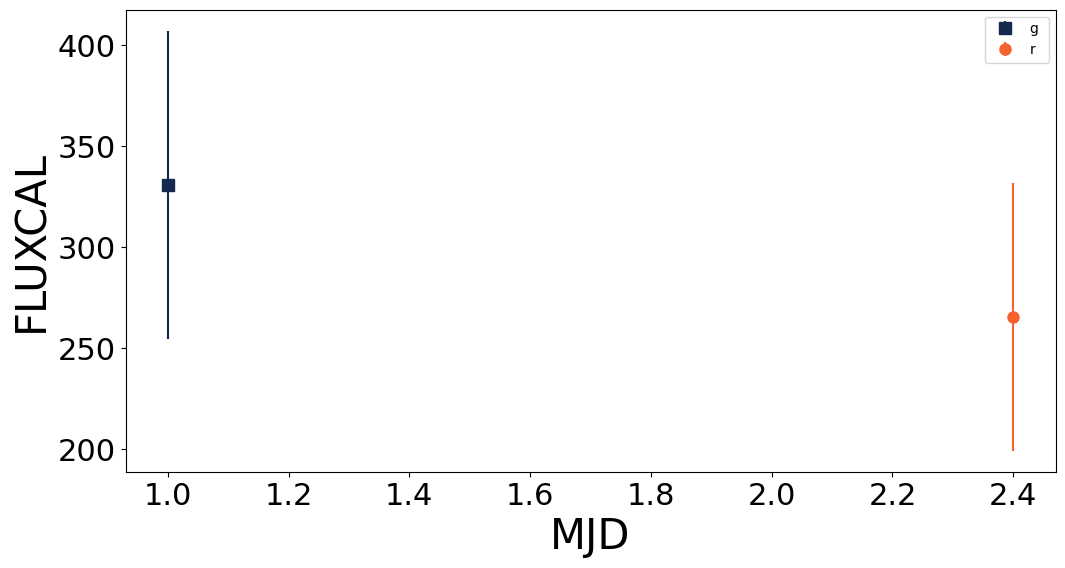

In [18]:

for object_id in df_header['SNID'].values:
    lc = df_phot[df_phot['SNID'] == object_id]
    plot_light_curve(lc=lc, color_band_dict=color_band_dict, bands=[b'g', b'r'], band_map={b'r': 'r',b'g':'g'}, markers={b'r': 'o',b'g':'s'})
    plt.show()
    break

In [19]:
sub_directory = "complete"
flux_lim =200

In [20]:
complete_features_df = pd.read_csv(os.path.join(data_dir, sub_directory, "train_features.csv"),index_col=0)

          SNID  SNTYPE SUBSURVEY     IAUC  FAKE        RA  PIXSIZE  NXPIX  \
10966  3347880     151      b' '  b'NULL'     2  4.383388      1.0     -9   

       NYPIX  CCDNUM  ...  SIM_MWEBV   SIM_PEAKMJD  SIM_MAGSMEAR_COH   SIM_AV  \
10966     -9       0  ...    0.02057  57501.402344               0.0  0.03686   

       SIM_RV  SIM_PEAKMAG_g  SIM_PEAKMAG_r  SIM_EXPOSURE_g  SIM_EXPOSURE_r  \
10966     3.1      17.623735      17.990177             1.0             1.0   

       SIM_SUBSAMPLE_INDEX  
10966                   -9  

[1 rows x 60 columns]
[0.01929212]
{b'g': [0.6147307522610407, 0.2494158020673585, -0.3710357175149711], b'r': [0.5344827290191522, 0.2468082074880015, -0.2978046259406833]}


/pbs/throng/lsst/users/bbiswas/kndetect/kndetect/plot_lightcurve.py:105: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax.errorbar(


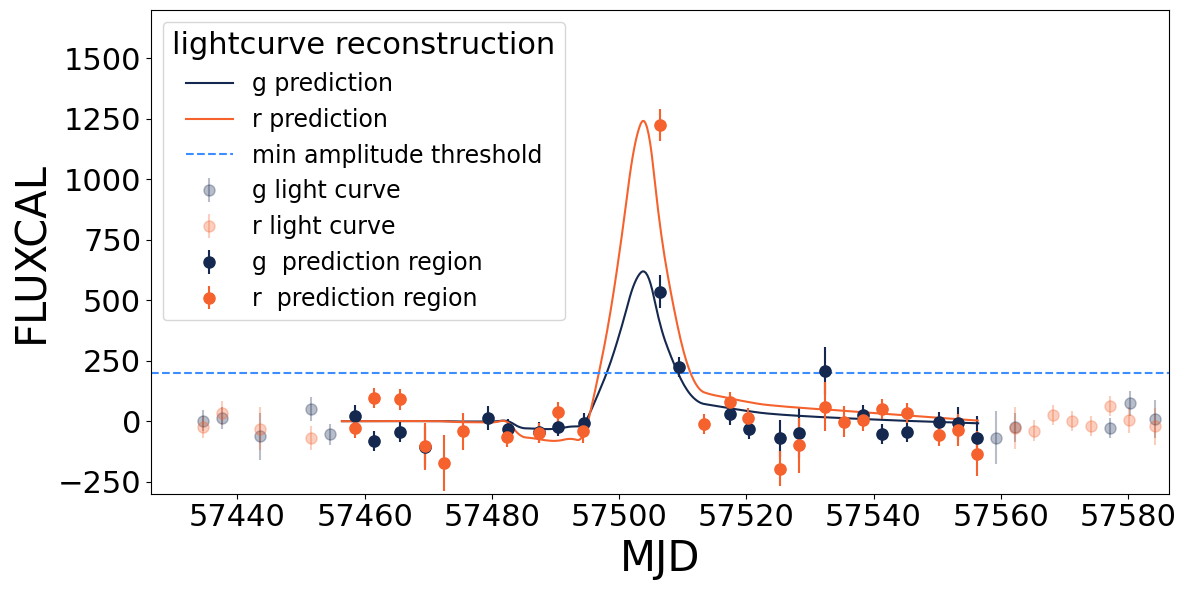

In [21]:
color_band_dict = {b'g': '#15284F', b'r': '#F5622E'}

snid = 3347880
object_features = complete_features_df[complete_features_df["key"]==snid].squeeze()

object_lc = df_phot[df_phot["SNID"]==snid]
print(df_header[df_header["SNID"]==snid])
print(df_header[df_header["SNID"]==snid]['SIM_REDSHIFT_CMB'].values)
band_coeff_dict = get_band_coeff_dict(object_features)
print(band_coeff_dict)
plot_predicted_bands(lc=object_lc, all_band_coeff_dict=band_coeff_dict, features=object_features, color_band_dict=color_band_dict, flux_lim=flux_lim, pcs=load_pcs(), band_map={b'r': 'r',b'g':'g'}, duration=30, legend_title="lightcurve reconstruction")
plt.ylim([-300, 1700])
ax = plt.gca()
plt.savefig(os.path.join("results", "complete", "kn_event"))
plt.savefig(os.path.join("results", "complete", "kn_event.pdf"))
plt.show()
plt.close()

       SNID  SNTYPE SUBSURVEY     IAUC  FAKE        RA  PIXSIZE  NXPIX  NYPIX  \
1323  40508     101      b' '  b'NULL'     2  6.073746      1.0     -9     -9   

      CCDNUM  ...  SIM_MWEBV   SIM_PEAKMJD  SIM_MAGSMEAR_COH  SIM_AV  SIM_RV  \
1323       0  ...   0.019908  57677.699219         -0.180319    -9.0    -9.0   

      SIM_PEAKMAG_g  SIM_PEAKMAG_r  SIM_EXPOSURE_g  SIM_EXPOSURE_r  \
1323      19.576956       19.58272             1.0             1.0   

      SIM_SUBSAMPLE_INDEX  
1323                   -9  

[1 rows x 60 columns]
[0.12995093]
{b'g': [1.0381108195238156, -0.214987494494775, -0.3974267545674686], b'r': [1.093015272655243, -0.166411785050009, -0.1962023049106356]}


/pbs/throng/lsst/users/bbiswas/kndetect/kndetect/plot_lightcurve.py:105: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax.errorbar(


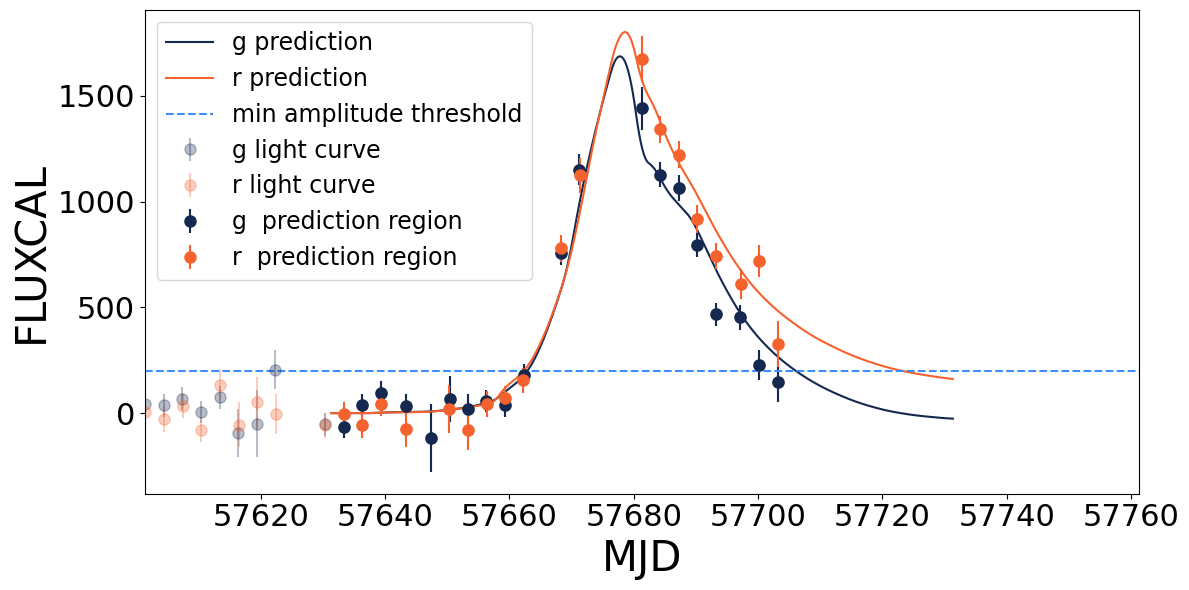

In [22]:
color_band_dict = {b'g': '#15284F', b'r': '#F5622E'}

snid = 40508
#print(object_features)

object_features = complete_features_df[complete_features_df["key"]==snid].squeeze()

object_lc = df_phot[df_phot["SNID"]==snid]
print(df_header[df_header["SNID"]==snid])
print(df_header[df_header["SNID"]==snid]['SIM_REDSHIFT_CMB'].values)
band_coeff_dict = get_band_coeff_dict(object_features)
print(band_coeff_dict)
plot_predicted_bands(lc=object_lc, all_band_coeff_dict=band_coeff_dict, features=object_features, color_band_dict=color_band_dict, flux_lim=flux_lim, pcs=load_pcs(), band_map={b'r': 'r',b'g':'g'}, duration=30)
plt.savefig(os.path.join("results", "complete", "non_kn_events"))
plt.savefig(os.path.join("results", "complete", "non_kn_events.pdf"))
plt.show()
plt.close()


In [23]:
complete_features_df

,coeff1_g,coeff2_g,coeff3_g,residuo_g,maxflux_g,coeff1_r,coeff2_r,coeff3_r,residuo_r,maxflux_r,key,type,type_names,y_true,y_pred,y_score
0,0.290510,0.095632,0.074392,1.104283,230.670456,0.275086,0.113414,0.075967,1.964267,373.748047,1757,150,150: KN GW170817,True,True,0.948956
1,0.514803,0.116128,-0.073609,1.146572,427.853790,1.017285,-0.065936,-0.210053,1.474833,788.683228,6415,141,141: 91BG,False,False,0.000000
2,1.067839,-0.114932,0.315341,0.990398,270.629425,1.096944,-0.036559,0.173198,0.974568,518.246521,7707,103,103: Core collapse Type Ibc,False,False,0.000000
4,0.785228,0.026194,-0.227322,1.078376,263.286224,0.493918,-0.199459,-0.287732,0.937045,291.099426,12578,102,102: MOSFIT-Ibc,False,False,0.000000
5,0.516106,0.123479,-0.052812,2.191080,636.599168,0.748878,0.128943,-0.032813,0.905214,383.834531,15888,149,149: KN GRANDMA,True,True,0.837588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22275,1.088962,-0.014523,0.106654,1.693484,888.318420,1.205512,-0.059662,0.725981,1.578576,666.974243,137062467,112,112: Core collapse Type II,False,False,0.000000
22276,0.978098,-0.118905,-0.022548,1.571079,1141.677979,1.038589,-0.084343,0.017370,1.344228,1213.934937,137071784,170,170: AGN,False,False,0.000000
22277,0.934356,-0.129008,-0.007231,1.264973,295.870941,0.944728,-0.036172,-0.020847,0.761197,408.148193,137071978,143,143: Iax,False,False,0.000000
22278,0.206614,0.121759,0.131741,2.082643,525.301697,0.306185,0.283979,-0.027413,1.448031,445.314880,137079473,151,151: KN Karsen 2017,True,True,0.944313


In [24]:
complete_features_df[complete_features_df["key"]==snid]

,coeff1_g,coeff2_g,coeff3_g,residuo_g,maxflux_g,coeff1_r,coeff2_r,coeff3_r,residuo_r,maxflux_r,key,type,type_names,y_true,y_pred,y_score
15,1.038111,-0.214987,-0.397427,1.542398,1441.094604,1.093015,-0.166412,-0.196202,1.312741,1675.723877,40508,101,101: Ia SN,False,False,0.0


(array([21780.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   500.]),
 array([0.0000000e+00, 1.0000000e+19, 2.0000000e+19, 3.0000001e+19,
        4.0000000e+19, 5.0000001e+19, 6.0000002e+19, 7.0000003e+19,
        8.0000000e+19, 9.0000005e+19, 1.0000000e+20], dtype=float32),
 <BarContainer object of 10 artists>)

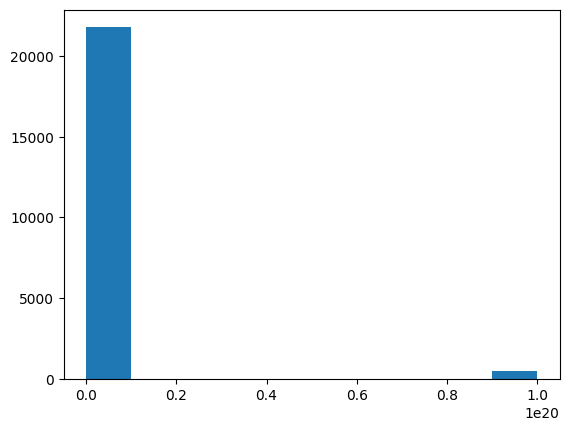

In [25]:
plt.hist(df_header['SIM_REDSHIFT_CMB'])

In [26]:
df_header

,SNID,SNTYPE,SUBSURVEY,IAUC,FAKE,RA,PIXSIZE,NXPIX,NYPIX,CCDNUM,...,SIM_MWEBV,SIM_PEAKMJD,SIM_MAGSMEAR_COH,SIM_AV,SIM_RV,SIM_PEAKMAG_g,SIM_PEAKMAG_r,SIM_EXPOSURE_g,SIM_EXPOSURE_r,SIM_SUBSAMPLE_INDEX
0,5081715,149,b'N/A',b'N/A',16959,1.000000e+20,1.000000e+20,16959,16959,16959,...,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,16959
1,6596653,149,b'N/A',b'N/A',16959,1.000000e+20,1.000000e+20,16959,16959,16959,...,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,16959
2,9086177,149,b'N/A',b'N/A',16959,1.000000e+20,1.000000e+20,16959,16959,16959,...,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,16959
3,3393105,149,b'N/A',b'N/A',16959,1.000000e+20,1.000000e+20,16959,16959,16959,...,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,16959
4,5800153,149,b'N/A',b'N/A',16959,1.000000e+20,1.000000e+20,16959,16959,16959,...,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,16959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22275,769000,190,b' ',b'NULL',2,1.642074e+00,1.000000e+00,-9,-9,0,...,3.627962e-02,5.759820e+04,0.000000e+00,-9.000000e+00,-9.000000e+00,2.026069e+01,1.916512e+01,1.000000e+00,1.000000e+00,-9
22276,73480109,190,b' ',b'NULL',2,9.516176e-01,1.000000e+00,-9,-9,0,...,2.369709e-02,5.696953e+04,0.000000e+00,-9.000000e+00,-9.000000e+00,2.076467e+01,1.968107e+01,1.000000e+00,1.000000e+00,-9
22277,132283133,190,b' ',b'NULL',2,3.806571e+00,1.000000e+00,-9,-9,0,...,2.141795e-02,5.748764e+04,0.000000e+00,-9.000000e+00,-9.000000e+00,1.975302e+01,1.867547e+01,1.000000e+00,1.000000e+00,-9
22278,33259310,190,b' ',b'NULL',2,4.558530e+00,1.000000e+00,-9,-9,0,...,2.260945e-02,5.745557e+04,0.000000e+00,-9.000000e+00,-9.000000e+00,1.943544e+01,1.869953e+01,1.000000e+00,1.000000e+00,-9
